In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
data=load_breast_cancer()
print(data.DESCR[:700])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
   


In [6]:
print(data.target_names)

['malignant' 'benign']


In [9]:
X=data.data
y=data.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [10]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=200)
y_train[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [12]:
clf=svm.SVC(kernel='linear',probability=True,verbose=True)

In [14]:
clf.fit(X_train,y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [15]:
y_preds=clf.predict(X_test)
y_proba=clf.predict_proba(X_test)
print(y_preds[:5])
print(y_test[:5])
print(y_proba[:5])

[0 0 0 1 1]
[0 0 0 1 1]
[[9.54175452e-01 4.58245483e-02]
 [9.99994417e-01 5.58295073e-06]
 [9.89191941e-01 1.08080592e-02]
 [1.49813531e-02 9.85018647e-01]
 [3.52435313e-01 6.47564687e-01]]


In [16]:
y_proba.shape

(200, 2)

In [17]:
y_pro = y_proba[:,1].reshape((y_proba.shape[0],))
print("2D to 1D reshaped Probability of benign. ", y_pro[:5])


2D to 1D reshaped Probability of benign.  [4.58245483e-02 5.58295073e-06 1.08080592e-02 9.85018647e-01
 6.47564687e-01]


In [18]:
y_pro.shape

(200,)

In [20]:
y_proba=y_proba[:,1].reshape((y_proba.shape[0],))
print(y_proba[:5])

[4.58245483e-02 5.58295073e-06 1.08080592e-02 9.85018647e-01
 6.47564687e-01]


In [25]:
TN,FP,FN,TP=metrics.confusion_matrix(list(y_test),list(y_preds),labels=[0,1]).ravel()
print(TN)
print(TP)
print(FP)
print(FN)

sklearnconf=metrics.confusion_matrix(y_test,y_preds)
print(sklearnconf)
conf=metrics.confusion_matrix(y_test,y_preds,labels=[1,0])
print(conf)

74
120
2
4
[[ 74   2]
 [  4 120]]
[[120   4]
 [  2  74]]


In [28]:
ACC=(TP+TN)/(TP+TN+FP+FN)
print(f"predicted ACC is {ACC:.3f}")
print(f"actual ACC is {metrics.accuracy_score(y_test,y_preds): .3f}")

predicted ACC is 0.970
actual ACC is  0.970


In [35]:
#Recall or Sensitivity
TPR=TP/(TP+FN)
print(f"{TPR:.3f}")
print(f"{metrics.recall_score(y_test,y_preds): .3f}")

0.968
 0.968


In [36]:
#Specificity
TNR=TN/(TN+FP)
print(f'{TNR:.3f}')
print()

0.974



In [37]:
#PPv or Precision
PPV=TP/(TP+FP)
print(f'{PPV:.3f}')
print(f'{metrics.precision_score(y_test,y_preds): .3f}')

0.984
 0.984


In [ ]:
NPV=TN/(TN+FN)

In [38]:
#F1
F1=(2*PPV*TPR)/(PPV+TPR)
print(f'{F1:.3f}')
print(f'{metrics.f1_score(y_test,y_preds):.3f}')

0.976
0.976


In [40]:
MCC=((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5
print(f'{MCC:.3f}')
print(f'{metrics.matthews_corrcoef(y_test,y_preds):.3f}')

0.937
0.937


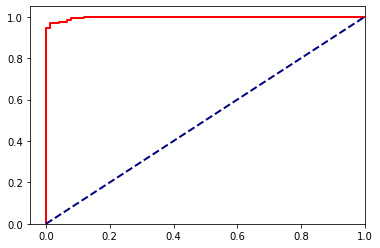

In [44]:
FPRs,TPRs,_=metrics.roc_curve(y_test,y_proba)
plt.plot(FPRs,TPRs,color='red',lw=2,label='ROC')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--',label='mean')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.show()

In [45]:
print(metrics.roc_auc_score(y_test,y_proba))

0.9972410865874363


In [57]:
def get_confusion_matrix(y_true,y_pred):
    n_classes=len(np.unique
                  (y_true))
    conf=np.zeros((n_classes,n_classes))
    for actual,pred in zip(y_true,y_pred):
        conf[int(actual)][int(pred)]+=1
    return conf.astype('int')

In [58]:
def get_roc_curve(y_test,y_proba,delta=0.1):
    thresh=list(np.arange(0,1,delta))+[1]
    TPRs=[]
    FPRs=[]
    y_pred=np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba<th]=0
        y_pred[y_proba>=th]=1
        
        (TN,FP),(FN,TP)=get_confusion_matrix(y_test,y_pred)
        TPR=TP/(TP+FN)
        FPR=FP/(FP+TN)
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs,TPRs,thresh

In [59]:
delta=0.001
FPRs,TPRs,_=get_roc_curve(y_test,y_proba,delta)

In [63]:
def get_roc_auc_score(y_test,y_proba):
    FPRs,TPRs,_=get_roc_curve(y_test, y_proba)
    FPRs.reverse()
    TPRs.reverse()
    x1, y1 = FPRs[0], TPRs[0]
    auc = 0.0
    prev = 0.0
    diffs = [FPRs[i] - FPRs[i-1] for i in range(1, len(FPRs))]
    for x, y in zip(diffs, TPRs[1:]):
        auc += (x * y1)  # area of rectangle
        auc += (x * (y - y1)/2)  # area of triangle formed (if any)
        y1 = y
        
    return auc
    
    

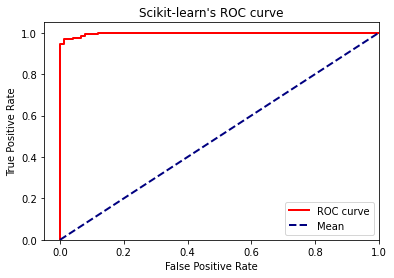

In [61]:

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [64]:
auc_score = get_roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9975
